In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
data = pd.read_csv("../data/dataset.csv")

In [80]:
# check if there is na/all-0 col in dataframe
data.isna().values.any()

False

In [81]:
(data==0).any(axis=0)

Benchmark                   False
Input Size                  False
Threads                     False
cycles                      False
instructions                False
ins_per_cycle               False
cache_references            False
cache_misses                False
cache_misses_percent        False
branches_instructions       False
branch_misses               False
bus_cycles                  False
ref_cycles                  False
alignment_faults             True
bpf_output                   True
cpu_clock                   False
cpu_migrations               True
dummy                        True
emulation_faults             True
major_faults                 True
minor_faults                False
page_faults                 False
LLC_loads                   False
LLC_load_misses             False
LLC_misses_percent          False
LLC_stores                  False
LLC_store_misses            False
LLC_store_misses_percent    False
time                        False
user_time     

In [82]:
data = data.loc[:,(data!=0).any(axis=0)]

In [83]:
data.head(5)

,Benchmark,Input Size,Threads,cycles,instructions,ins_per_cycle,cache_references,cache_misses,cache_misses_percent,branches_instructions,...,page_faults,LLC_loads,LLC_load_misses,LLC_misses_percent,LLC_stores,LLC_store_misses,LLC_store_misses_percent,time,user_time,sys_time
0,blackscholes,simsmall,1,521324755,668243892,1.28,13221057,137813,1.042,174052847,...,69534,3586395,67890,1.892987,2044892,33142,1.620721,0.045,0.045,0.0
1,blackscholes,simsmall,2,604087463,745514225,1.23,13201504,205125,1.554,179328504,...,69530,3756986,83124,2.212518,1932305,46893,2.426791,0.028,0.045,0.0
2,blackscholes,simsmall,3,540727036,676803235,1.25,14204116,184545,1.299,177831187,...,69493,3291078,25693,0.780686,2158862,14048,0.650713,0.023,0.045,0.0
3,blackscholes,simsmall,4,568738331,689568815,1.21,13690247,205561,1.502,155514994,...,70120,3594115,79537,2.212979,1976488,22368,1.131704,0.021,0.046,0.0
4,blackscholes,simsmall,5,506534749,642433245,1.27,12650468,87662,0.693,149658203,...,69519,3211251,54678,1.702701,2390876,9848,0.411899,0.018,0.045,0.0


In [84]:
data.shape

(12000, 27)

In [85]:
data.columns

Index(['Benchmark', 'Input Size', 'Threads', 'cycles', 'instructions',
       'ins_per_cycle', 'cache_references', 'cache_misses',
       'cache_misses_percent', 'branches_instructions', 'branch_misses',
       'bus_cycles', 'ref_cycles', 'cpu_clock', 'cpu_migrations',
       'major_faults', 'minor_faults', 'page_faults', 'LLC_loads',
       'LLC_load_misses', 'LLC_misses_percent', 'LLC_stores',
       'LLC_store_misses', 'LLC_store_misses_percent', 'time', 'user_time',
       'sys_time'],
      dtype='object')

In [86]:
data.head(5)

,Benchmark,Input Size,Threads,cycles,instructions,ins_per_cycle,cache_references,cache_misses,cache_misses_percent,branches_instructions,...,page_faults,LLC_loads,LLC_load_misses,LLC_misses_percent,LLC_stores,LLC_store_misses,LLC_store_misses_percent,time,user_time,sys_time
0,blackscholes,simsmall,1,521324755,668243892,1.28,13221057,137813,1.042,174052847,...,69534,3586395,67890,1.892987,2044892,33142,1.620721,0.045,0.045,0.0
1,blackscholes,simsmall,2,604087463,745514225,1.23,13201504,205125,1.554,179328504,...,69530,3756986,83124,2.212518,1932305,46893,2.426791,0.028,0.045,0.0
2,blackscholes,simsmall,3,540727036,676803235,1.25,14204116,184545,1.299,177831187,...,69493,3291078,25693,0.780686,2158862,14048,0.650713,0.023,0.045,0.0
3,blackscholes,simsmall,4,568738331,689568815,1.21,13690247,205561,1.502,155514994,...,70120,3594115,79537,2.212979,1976488,22368,1.131704,0.021,0.046,0.0
4,blackscholes,simsmall,5,506534749,642433245,1.27,12650468,87662,0.693,149658203,...,69519,3211251,54678,1.702701,2390876,9848,0.411899,0.018,0.045,0.0


In [87]:
data.dtypes

Benchmark                    object
Input Size                   object
Threads                       int64
cycles                        int64
instructions                  int64
ins_per_cycle               float64
cache_references              int64
cache_misses                  int64
cache_misses_percent        float64
branches_instructions         int64
branch_misses                 int64
bus_cycles                    int64
ref_cycles                    int64
cpu_clock                   float64
cpu_migrations                int64
major_faults                  int64
minor_faults                  int64
page_faults                   int64
LLC_loads                     int64
LLC_load_misses               int64
LLC_misses_percent          float64
LLC_stores                    int64
LLC_store_misses              int64
LLC_store_misses_percent    float64
time                        float64
user_time                   float64
sys_time                    float64
dtype: object

In [88]:
data.describe()

,Threads,cycles,instructions,ins_per_cycle,cache_references,cache_misses,cache_misses_percent,branches_instructions,branch_misses,bus_cycles,...,page_faults,LLC_loads,LLC_load_misses,LLC_misses_percent,LLC_stores,LLC_store_misses,LLC_store_misses_percent,time,user_time,sys_time
count,12000.000000,1.200000e+04,1.200000e+04,12000.000000,1.200000e+04,1.200000e+04,12000.000000,1.200000e+04,1.200000e+04,1.200000e+04,...,1.200000e+04,1.200000e+04,1.200000e+04,12000.000000,1.200000e+04,1.200000e+04,12000.000000,12000.000000,12000.000000,12000.000000
mean,8.500000,5.727307e+09,9.859915e+09,1.595872,1.685333e+08,7.030203e+06,5.201414,1.368561e+09,2.114916e+07,2.720756e+08,...,9.685573e+04,3.171914e+07,1.704509e+06,5.813969,9.158729e+06,9.672202e+05,4.728276,0.719336,2.303442,0.170095
std,4.609964,8.256475e+09,1.548821e+10,0.502680,6.255121e+08,3.060518e+07,7.131502,1.960565e+09,3.865963e+07,3.777738e+08,...,1.017851e+05,1.003471e+08,5.048689e+06,8.061491,2.001272e+07,4.042147e+06,8.129125,1.461229,3.531612,0.588309
min,1.000000,4.430309e+08,5.479203e+08,0.510000,8.368830e+06,5.386500e+04,0.003000,1.309339e+08,2.909465e+06,2.450477e+07,...,6.807300e+04,2.398443e+06,1.475900e+04,0.007333,1.027391e+06,5.084000e+03,0.092580,0.002000,0.000000,0.000000
25%,4.750000,6.945940e+08,9.558909e+08,1.230000,1.522629e+07,1.940625e+05,0.982000,2.089169e+08,4.104572e+06,4.082375e+07,...,6.973500e+04,4.003034e+06,5.404850e+04,0.950551,2.317424e+06,2.257475e+04,0.795311,0.098000,0.062000,0.002000
50%,8.500000,1.837113e+09,3.107422e+09,1.430000,2.427978e+07,5.894810e+05,2.029000,4.926237e+08,6.942319e+06,9.621546e+07,...,7.161750e+04,6.287350e+06,1.855800e+05,2.332171,3.835776e+06,5.718850e+04,1.412680,0.190500,0.646000,0.025000
75%,12.250000,7.049128e+09,1.162632e+10,1.860000,5.933671e+07,2.657690e+06,7.190000,1.583072e+09,1.711841e+07,3.329123e+08,...,8.398600e+04,1.744948e+07,7.826198e+05,7.109470,6.898424e+06,2.651640e+05,3.847585,0.595000,3.002250,0.093000
max,16.000000,4.399288e+10,9.605588e+10,3.490000,5.175426e+09,4.047564e+08,53.439000,1.028992e+10,2.703555e+08,2.026865e+09,...,1.192374e+06,1.095928e+09,5.533783e+07,60.684001,3.441865e+08,6.094097e+07,78.495231,15.408000,20.082000,7.065000


In [89]:
benchmark = data['Benchmark'].unique()
input_size = data['Input Size'].unique()

for i in range(len(benchmark)):
    data.replace({benchmark[i]:i},inplace=True)

for i in range(len(input_size)):
    data.replace({input_size[i]:i},inplace=True)

In [90]:
data.dtypes

Benchmark                     int64
Input Size                    int64
Threads                       int64
cycles                        int64
instructions                  int64
ins_per_cycle               float64
cache_references              int64
cache_misses                  int64
cache_misses_percent        float64
branches_instructions         int64
branch_misses                 int64
bus_cycles                    int64
ref_cycles                    int64
cpu_clock                   float64
cpu_migrations                int64
major_faults                  int64
minor_faults                  int64
page_faults                   int64
LLC_loads                     int64
LLC_load_misses               int64
LLC_misses_percent          float64
LLC_stores                    int64
LLC_store_misses              int64
LLC_store_misses_percent    float64
time                        float64
user_time                   float64
sys_time                    float64
dtype: object

In [91]:
data.head(5)

,Benchmark,Input Size,Threads,cycles,instructions,ins_per_cycle,cache_references,cache_misses,cache_misses_percent,branches_instructions,...,page_faults,LLC_loads,LLC_load_misses,LLC_misses_percent,LLC_stores,LLC_store_misses,LLC_store_misses_percent,time,user_time,sys_time
0,0,0,1,521324755,668243892,1.28,13221057,137813,1.042,174052847,...,69534,3586395,67890,1.892987,2044892,33142,1.620721,0.045,0.045,0.0
1,0,0,2,604087463,745514225,1.23,13201504,205125,1.554,179328504,...,69530,3756986,83124,2.212518,1932305,46893,2.426791,0.028,0.045,0.0
2,0,0,3,540727036,676803235,1.25,14204116,184545,1.299,177831187,...,69493,3291078,25693,0.780686,2158862,14048,0.650713,0.023,0.045,0.0
3,0,0,4,568738331,689568815,1.21,13690247,205561,1.502,155514994,...,70120,3594115,79537,2.212979,1976488,22368,1.131704,0.021,0.046,0.0
4,0,0,5,506534749,642433245,1.27,12650468,87662,0.693,149658203,...,69519,3211251,54678,1.702701,2390876,9848,0.411899,0.018,0.045,0.0


In [92]:
data.describe()

,Benchmark,Input Size,Threads,cycles,instructions,ins_per_cycle,cache_references,cache_misses,cache_misses_percent,branches_instructions,...,page_faults,LLC_loads,LLC_load_misses,LLC_misses_percent,LLC_stores,LLC_store_misses,LLC_store_misses_percent,time,user_time,sys_time
count,12000.000000,12000.000000,12000.000000,1.200000e+04,1.200000e+04,12000.000000,1.200000e+04,1.200000e+04,12000.000000,1.200000e+04,...,1.200000e+04,1.200000e+04,1.200000e+04,12000.000000,1.200000e+04,1.200000e+04,12000.000000,12000.000000,12000.000000,12000.000000
mean,12.000000,1.000000,8.500000,5.727307e+09,9.859915e+09,1.595872,1.685333e+08,7.030203e+06,5.201414,1.368561e+09,...,9.685573e+04,3.171914e+07,1.704509e+06,5.813969,9.158729e+06,9.672202e+05,4.728276,0.719336,2.303442,0.170095
std,7.211403,0.816531,4.609964,8.256475e+09,1.548821e+10,0.502680,6.255121e+08,3.060518e+07,7.131502,1.960565e+09,...,1.017851e+05,1.003471e+08,5.048689e+06,8.061491,2.001272e+07,4.042147e+06,8.129125,1.461229,3.531612,0.588309
min,0.000000,0.000000,1.000000,4.430309e+08,5.479203e+08,0.510000,8.368830e+06,5.386500e+04,0.003000,1.309339e+08,...,6.807300e+04,2.398443e+06,1.475900e+04,0.007333,1.027391e+06,5.084000e+03,0.092580,0.002000,0.000000,0.000000
25%,6.000000,0.000000,4.750000,6.945940e+08,9.558909e+08,1.230000,1.522629e+07,1.940625e+05,0.982000,2.089169e+08,...,6.973500e+04,4.003034e+06,5.404850e+04,0.950551,2.317424e+06,2.257475e+04,0.795311,0.098000,0.062000,0.002000
50%,12.000000,1.000000,8.500000,1.837113e+09,3.107422e+09,1.430000,2.427978e+07,5.894810e+05,2.029000,4.926237e+08,...,7.161750e+04,6.287350e+06,1.855800e+05,2.332171,3.835776e+06,5.718850e+04,1.412680,0.190500,0.646000,0.025000
75%,18.000000,2.000000,12.250000,7.049128e+09,1.162632e+10,1.860000,5.933671e+07,2.657690e+06,7.190000,1.583072e+09,...,8.398600e+04,1.744948e+07,7.826198e+05,7.109470,6.898424e+06,2.651640e+05,3.847585,0.595000,3.002250,0.093000
max,24.000000,2.000000,16.000000,4.399288e+10,9.605588e+10,3.490000,5.175426e+09,4.047564e+08,53.439000,1.028992e+10,...,1.192374e+06,1.095928e+09,5.533783e+07,60.684001,3.441865e+08,6.094097e+07,78.495231,15.408000,20.082000,7.065000


In [93]:
baseline = [[0 for i in range(len(benchmark))] for j in range(len(input_size))] 

for i in range(len(data['Benchmark'])):
    if data['Threads'][i] == 1:
        baseline[data['Input Size'][i]][data['Benchmark'][i]] += data['time'][i]

baseline = pd.DataFrame(baseline)/10

avg_time = [0 for i in range(len(data['Benchmark']))]
for i in range(len(data['Benchmark'])):
    avg_time[i] = baseline[data['Benchmark'][i]][data['Input Size'][i]]
    
data['avg_time'] = pd.Series(avg_time)
data['Speedup'] = pd.Series(avg_time)/data['time']

In [94]:
data = data[data['Speedup']<=16]

In [95]:
data.head(5)

,Benchmark,Input Size,Threads,cycles,instructions,ins_per_cycle,cache_references,cache_misses,cache_misses_percent,branches_instructions,...,LLC_load_misses,LLC_misses_percent,LLC_stores,LLC_store_misses,LLC_store_misses_percent,time,user_time,sys_time,avg_time,Speedup
0,0,0,1,521324755,668243892,1.28,13221057,137813,1.042,174052847,...,67890,1.892987,2044892,33142,1.620721,0.045,0.045,0.0,0.0453,1.006667
1,0,0,2,604087463,745514225,1.23,13201504,205125,1.554,179328504,...,83124,2.212518,1932305,46893,2.426791,0.028,0.045,0.0,0.0453,1.617857
2,0,0,3,540727036,676803235,1.25,14204116,184545,1.299,177831187,...,25693,0.780686,2158862,14048,0.650713,0.023,0.045,0.0,0.0453,1.969565
3,0,0,4,568738331,689568815,1.21,13690247,205561,1.502,155514994,...,79537,2.212979,1976488,22368,1.131704,0.021,0.046,0.0,0.0453,2.157143
4,0,0,5,506534749,642433245,1.27,12650468,87662,0.693,149658203,...,54678,1.702701,2390876,9848,0.411899,0.018,0.045,0.0,0.0453,2.516667


In [96]:
data.columns

Index(['Benchmark', 'Input Size', 'Threads', 'cycles', 'instructions',
       'ins_per_cycle', 'cache_references', 'cache_misses',
       'cache_misses_percent', 'branches_instructions', 'branch_misses',
       'bus_cycles', 'ref_cycles', 'cpu_clock', 'cpu_migrations',
       'major_faults', 'minor_faults', 'page_faults', 'LLC_loads',
       'LLC_load_misses', 'LLC_misses_percent', 'LLC_stores',
       'LLC_store_misses', 'LLC_store_misses_percent', 'time', 'user_time',
       'sys_time', 'avg_time', 'Speedup'],
      dtype='object')

In [97]:
corr = data.drop(columns='time',inplace=False).corr()

In [98]:
corr

,Benchmark,Input Size,Threads,cycles,instructions,ins_per_cycle,cache_references,cache_misses,cache_misses_percent,branches_instructions,...,LLC_loads,LLC_load_misses,LLC_misses_percent,LLC_stores,LLC_store_misses,LLC_store_misses_percent,user_time,sys_time,avg_time,Speedup
Benchmark,1.000000e+00,7.735353e-17,-9.433150e-03,0.087066,0.199290,0.309120,0.239347,0.061771,-0.100986,0.140501,...,0.171972,-0.028820,-0.134796,-0.026894,0.036047,-0.064000,0.104616,-0.080825,0.132709,0.188642
Input Size,7.735353e-17,1.000000e+00,2.344781e-18,0.598732,0.589009,0.309610,0.253426,0.236792,0.340049,0.590641,...,0.276391,0.334678,0.316626,0.310987,0.226195,0.259655,0.609491,0.204206,0.606458,0.241001
Threads,-9.433150e-03,2.344781e-18,1.000000e+00,0.073439,0.017063,-0.131421,-0.003012,-0.034637,0.030308,0.037283,...,-0.014040,-0.005818,0.005245,-0.009607,-0.009594,0.056717,0.073613,0.151131,-0.002300,0.437033
cycles,8.706621e-02,5.987318e-01,7.343886e-02,1.000000,0.904296,0.124033,0.500692,0.339959,0.394667,0.926780,...,0.508075,0.534705,0.375226,0.476287,0.351468,0.377981,0.991745,0.553123,0.949771,0.322727
instructions,1.992903e-01,5.890094e-01,1.706335e-02,0.904296,1.000000,0.404898,0.425632,0.173427,0.279572,0.957153,...,0.338822,0.318783,0.272870,0.262423,0.164757,0.252864,0.918689,0.337324,0.921855,0.355717
ins_per_cycle,3.091201e-01,3.096104e-01,-1.314215e-01,0.124033,0.404898,1.000000,-0.014919,-0.154791,-0.077815,0.331829,...,-0.123163,-0.196095,-0.132655,-0.167769,-0.188148,-0.108706,0.155899,-0.162903,0.215634,0.334241
cache_references,2.393466e-01,2.534263e-01,-3.012195e-03,0.500692,0.425632,-0.014919,1.000000,0.156169,-0.057889,0.426127,...,0.929818,0.121613,-0.081206,0.177550,0.151211,0.014502,0.532681,0.019871,0.559500,0.290546
cache_misses,6.177098e-02,2.367916e-01,-3.463746e-02,0.339959,0.173427,-0.154791,0.156169,1.000000,0.550300,0.143217,...,0.344550,0.887375,0.432059,0.792225,0.918750,0.477251,0.326348,0.240002,0.361562,0.040598
cache_misses_percent,-1.009860e-01,3.400493e-01,3.030843e-02,0.394667,0.279572,-0.077815,-0.057889,0.550300,1.000000,0.354783,...,0.022074,0.695887,0.903248,0.404077,0.546455,0.795777,0.373809,0.315338,0.382538,-0.029115
branches_instructions,1.405014e-01,5.906412e-01,3.728338e-02,0.926780,0.957153,0.331829,0.426127,0.143217,0.354783,1.000000,...,0.359660,0.361543,0.355602,0.280240,0.151058,0.298647,0.928945,0.436241,0.911799,0.315484


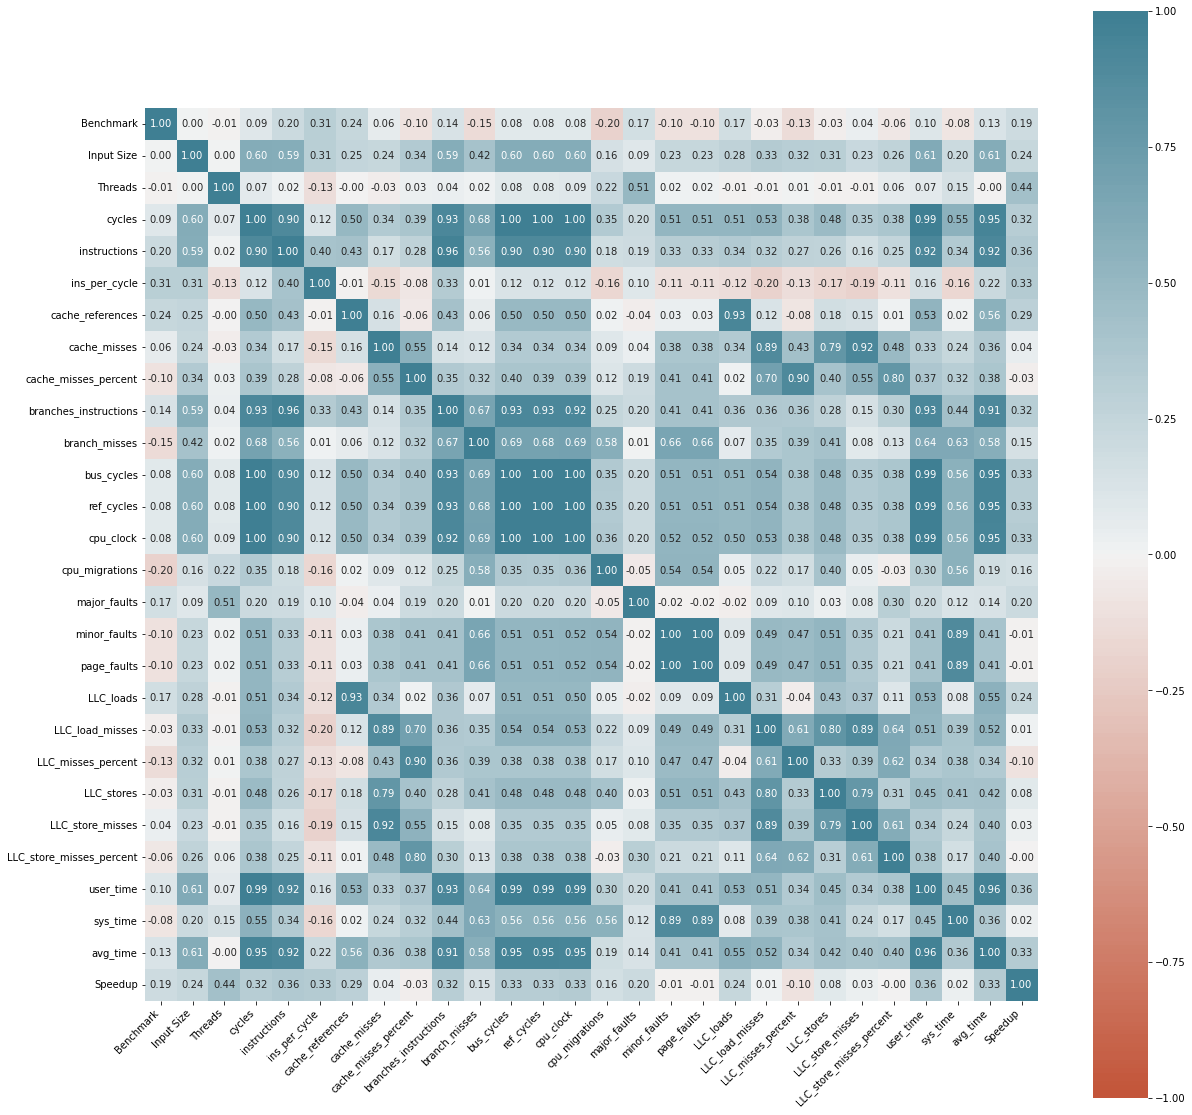

In [99]:
fig, ax = plt.subplots(figsize=(20, 20))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,annot=True,fmt=".2f"
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [100]:
unstack_corr = corr.unstack()

In [101]:
unstack_corr

Benchmark  Benchmark                   1.000000e+00
           Input Size                  7.735353e-17
           Threads                    -9.433150e-03
           cycles                      8.706621e-02
           instructions                1.992903e-01
                                           ...     
Speedup    LLC_store_misses_percent   -3.208453e-03
           user_time                   3.567679e-01
           sys_time                    2.358433e-02
           avg_time                    3.342644e-01
           Speedup                     1.000000e+00
Length: 784, dtype: float64

In [102]:
output = ['Speedup']
lst = []

for i in output:
    print(i+' correlation')
    corr_table = unstack_corr[abs(unstack_corr)>0.15][i].drop(output, errors='ignore')
    lst = *lst,*corr_table.index
    print(corr_table)
    print('\n')

print('correlated variables')
print(set(lst))

Speedup correlation
Benchmark                0.188642
Input Size               0.241001
Threads                  0.437033
cycles                   0.322727
instructions             0.355717
ins_per_cycle            0.334241
cache_references         0.290546
branches_instructions    0.315484
branch_misses            0.154266
bus_cycles               0.327959
ref_cycles               0.326256
cpu_clock                0.331849
cpu_migrations           0.156571
major_faults             0.204656
LLC_loads                0.241041
user_time                0.356768
avg_time                 0.334264
dtype: float64


correlated variables
{'Benchmark', 'avg_time', 'branch_misses', 'cpu_clock', 'ins_per_cycle', 'LLC_loads', 'user_time', 'cpu_migrations', 'bus_cycles', 'Threads', 'Input Size', 'instructions', 'major_faults', 'ref_cycles', 'cache_references', 'branches_instructions', 'cycles'}


In [103]:
new_data = data[[*set(lst),*output]]

In [104]:
new_data.shape

(10680, 18)

In [105]:
# temporary code
# new_data = data.drop(columns='time',inplace=False)

In [106]:
data.drop(columns='avg_time',inplace=False).to_csv('../data/preprocessed_data.csv',index=False)